# Linear Regression from Scratch

This notebook demonstrates Linear Regression implemented from scratch using NumPy.
We will:
- Train a simple linear regression model
- Visualize the predictions
- Plot the loss curve


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class LinearRegression:
    """
    Linear Regression implemented from scratch using Gradient Descent
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


## Dataset

We create a simple dataset with one feature:
- X: [[1], [2], [3], [4], [5]]
- y: [2, 4, 6, 8, 10]


In [3]:
# Simple dataset
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([2,4,6,8,10])


## Train Linear Regression Model


In [4]:
model = LinearRegression(learning_rate=0.01, n_iters=1000)
model.fit(X, y)
predictions = model.predict(X)

print("Weights:", model.weights)
print("Bias:", model.bias)
print("Predictions:", predictions)


Weights: [1.97375488]
Bias: 0.09475321533750963
Predictions: [2.06850809 4.04226297 6.01601785 7.98977273 9.96352761]


## Regression Line


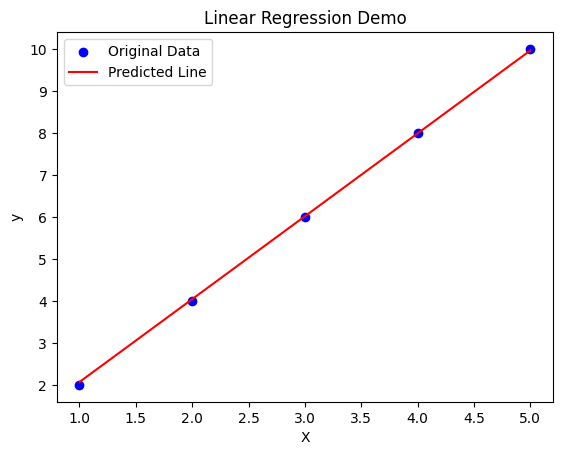

In [5]:
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, predictions, color='red', label='Predicted Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Demo")
plt.legend()
plt.show()


## Loss Curve


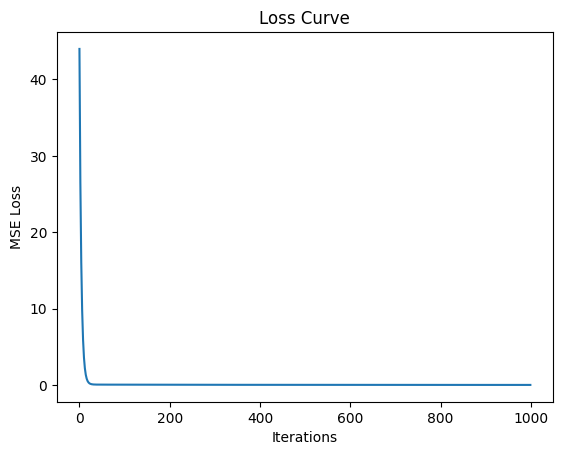

In [7]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve")
plt.show()
